# VTK Hexahedral Elements

The impetus behind the `vtk_tools` package is to automatically generate node ordering and shape function information about `vtk` elements that can then be ported over to other packages, in particularly [*yt*](yt-project.org/). 

This all started with the need to modify *yt*'s unstructured mesh loader to handle the new VTK output for the 27-noded 2nd Order Lagrange Hexahedral element output (VTK type 72). So this notebook just gives an overview of this element type. See http://victorsndvg.github.io/FEconv/formats/vtk.xhtml for a nice description of some of the other vtk elements. 

## 27-node second order (quadratic) hexahedron element with VTK node numbering convention 

The lagrange hexahedron node ordering conventions starts by numbering corner vertices, then edge-centers and then face-center of the hexahedron:

```
VTK Node number ordering for corners and edges: 

corners:                   edges:               

       z
7----------6            .----14----.      
|\     ^   |\           |\         |\     
| \    |   | \          | 15       | 13   
|  \   |   |  \         19 \       18 \   
|   4------+---5        |   .----12+---.  
|   |  +-- |-- | -> x   |   |      |   |  
3---+---\--2   |        .---+-10---.   |   
 \  |    \  \  |         \  16      \  17  
  \ |     \  \ |         11 |        9 |   
   \|      y  \|           \|         \|   
    0----------1            .----8-----.   
    
   
center-face node numbers 

y-z plane at x = -1 :   20 
y-z plane at x = +1 :   21
x-z plane at y = -1 :   22
x-z plane at y = +1 :   24
x-y plane at z = -1 :   23
x-y plane at z = +1 :   25

volume-center point node number: 26 
```

In 3D, this looks like: 

![](resources/vtkCellOrdering.png?raw=true)

The geometry here is that of the "parent element", which varies uniformly in each dimension while the element in real-space will have the same number of elements but may be deformed. 

Let's load up a first order lagrange hexahedral (VTK element type `72`) and make a similar plot:

In [1]:
import vtk_tools.shapefunctions as sfs

In [2]:
sf_72_O1 = sfs.sf(72,1)

The coordinates of the nodes in terms of distance along each dimension of the parent element are stored in the `node_coords` attribute:

In [3]:
sf_72_O1.node_coords

array([[-1., -1., -1.],
       [-1., -1.,  1.],
       [-1.,  1., -1.],
       [-1.,  1.,  1.],
       [ 1., -1., -1.],
       [ 1., -1.,  1.],
       [ 1.,  1., -1.],
       [ 1.,  1.,  1.]])

Let's visualize in 3D! First, we'll create a 3D axis with some bounding lines:

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 

<IPython.core.display.Javascript object>


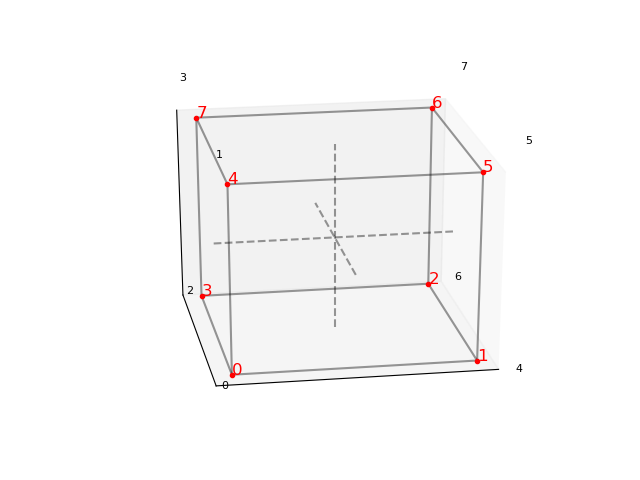

In [5]:
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')

def element_skeleton(ax):
    lncol=[0,0,0,.4]
    for xyz in [1,-1]:
        ax.plot([-1,1],[xyz,xyz],[xyz,xyz],color=lncol)
        ax.plot([xyz,xyz],[-1,1],[xyz,xyz],color=lncol)
        ax.plot([xyz,xyz],[xyz,xyz],[-1,1],color=lncol)    
        ax.plot([-1,1],[-xyz,-xyz],[xyz,xyz],color=lncol)
        ax.plot([-xyz,-xyz],[-1,1],[xyz,xyz],color=lncol)
        ax.plot([-xyz,-xyz],[xyz,xyz],[-1,1],color=lncol)    

    ax.plot([-1,1],[0.,0.],[0.,0.],'--',color=lncol)    
    ax.plot([0.,0.],[-1,1],[0.,0.],'--',color=lncol)    
    ax.plot([0.,0.],[0.,0.],[-1,1],'--',color=lncol)
  
    
element_skeleton(ax)    

And now, we'll add the coordinates as red points: 

In [6]:
ax.plot(sf_72_O1.node_coords[:,0],sf_72_O1.node_coords[:,1],sf_72_O1.node_coords[:,2],'.r')


And now, we'll add some labels to the points. But we want to add both the ijk and vtk node ordering conventions, so we'll make use of the `node_order_hash` attribute: 

In [7]:
sf_72_O1.node_order_hash

{0: 0, 4: 1, 3: 2, 7: 3, 1: 4, 5: 5, 2: 6, 6: 7}

this dictionary maps the VTK node number (the keys of the dictionary) to ijk order. So let's loop over each node combination and plot a label for each node numbering convention at each point:

In [8]:
ofc = 1.2 
for vtk_node, ijk_node in sf_72_O1.node_order_hash.items():
    xyz = sf_72_O1.node_coords[ijk_node]
    ax.text(xyz[0],xyz[1],xyz[2], str(vtk_node),fontsize=12,color='r')
        
    ijk_lab = str(ijk_node)
    ax.text(xyz[0]*ofc+.1,xyz[1]*ofc+.1,xyz[2]*ofc+.1, ijk_lab,fontsize=8,color='k')
    
# clear the axes so we can read the labels more easily:
def hide_the_axes(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.xaxis.set_ticklabels([]);
    ax.yaxis.set_ticklabels([]);
    ax.zaxis.set_ticklabels([]);
    ax.grid(False)

hide_the_axes(ax)

Now let's try for a 2nd order element!

In [9]:
sf_72_O2 = sfs.sf(72,2)

<IPython.core.display.Javascript object>


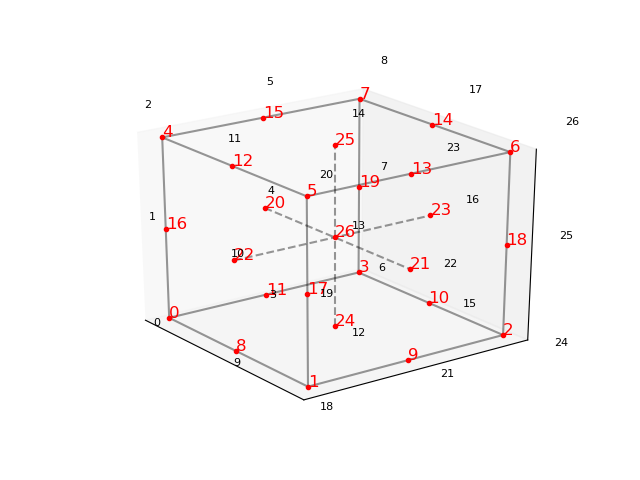

In [10]:
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
element_skeleton(ax)

ax.plot(sf_72_O2.node_coords[:,0],sf_72_O2.node_coords[:,1],sf_72_O2.node_coords[:,2],'.r')

ofc = 1.2 
for vtk_node, ijk_node in sf_72_O2.node_order_hash.items():
    xyz = sf_72_O2.node_coords[ijk_node]
    ax.text(xyz[0],xyz[1],xyz[2], str(vtk_node),fontsize=12,color='r')
        
    ijk_lab = str(ijk_node)
    ax.text(xyz[0]*ofc+.1,xyz[1]*ofc+.1,xyz[2]*ofc+.1, ijk_lab,fontsize=8,color='k')
    
# clear the axes so we can read the labels more easily:    
hide_the_axes(ax)
